In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.18.0
Keras Version 3.8.0


In [2]:
check_list = ['GPU','CPU']

for ob in check_list:
    c = tf.config.list_physical_devices(ob)
    if len(c) > 0:
        print(f"{ob} is avaliable")
        print(c)
    else:
        print(f"{ob} is not avaliable")


GPU is not avaliable
CPU is avaliable
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


#### Creating a simple classifier using keras on MNIST data

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [6]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
print(f"Data Type of X_train {X_train.dtype}")
print(f"Data Type of X_train {y_train.dtype}")

Data Type of X_train uint8
Data Type of X_train uint8


In [9]:
# Creating validation dataset
# Scale the data between 0 to 1 by dividing it by 255. at its an unsigned data between 0-255
x_valid, x_train = X_train[:5000]/255, X_train[5000:]/255
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = X_test/255

In [10]:
# Train 50000
# Validation - 5000
# Test - 10000

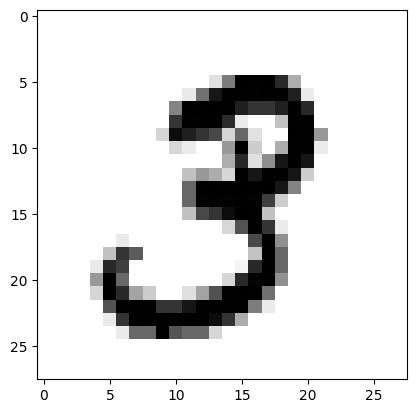

In [11]:
plt.imshow(x_train[1],cmap='binary')

<Axes: >

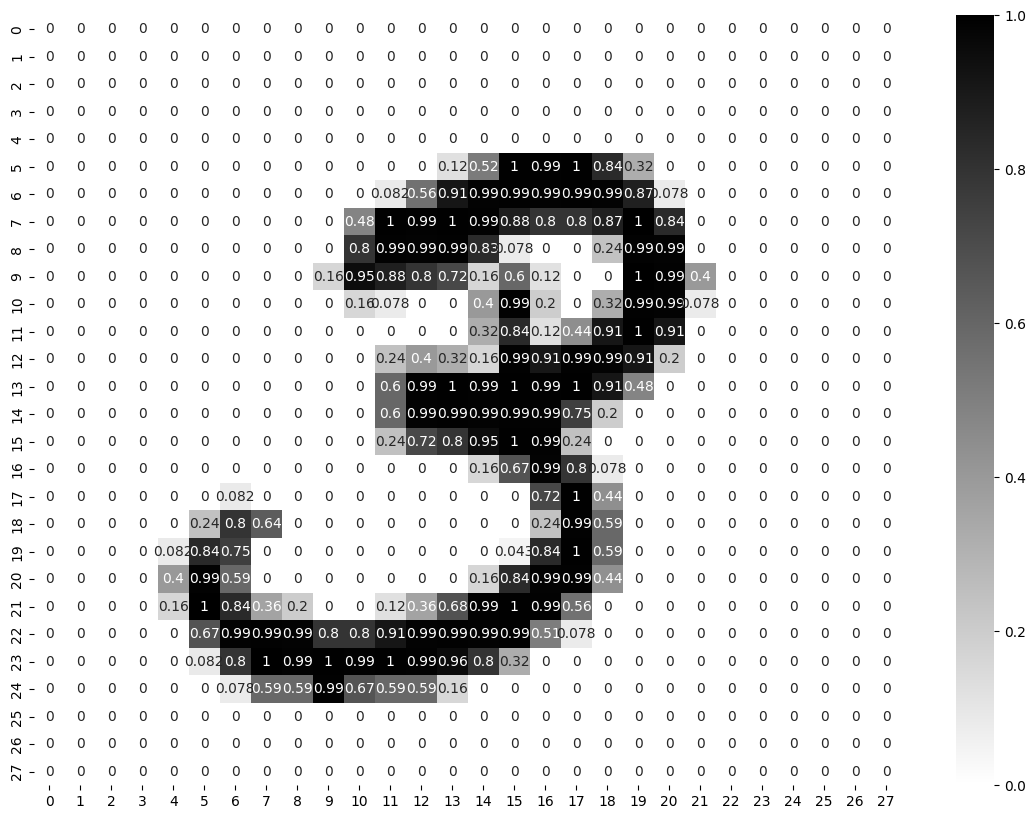

In [12]:
plt.figure(figsize=(14,10))
sns.heatmap(x_train[1],annot=True,cmap='binary')

In [13]:
# input d = 28x28
# outputs = 0,1,2,3,4,5,6,7,8,9,10

In [14]:
# Layers
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
          tf.keras.layers.Dense(300, activation="relu",name='hiddenLayer1'),
          tf.keras.layers.Dense(100, activation='relu',name='hiddenLayer2'),
          tf.keras.layers.Dense(10, activation='softmax',name='outputLayer')
          ]

model_clf = tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [16]:
model_clf.summary()
param1 = 784*300 + 300
param2 = 300*100 + 100
param3 = 100*10 + 10
print(sum((param1,param2,param3)))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

266610


In [17]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [18]:
hidden2 = model_clf.layers[2]
print(f"hidden2 name: {hidden2.name}")


hidden2 name: hiddenLayer2


In [19]:
hidden1.get_weights()[0].shape

(784, 300)

In [20]:
hidden2.get_weights()[0].shape

(300, 100)

In [21]:
weights ,biases = hidden1.get_weights()

In [22]:
biases.shape

(300,)

In [23]:
weights.shape

(784, 300)

In [24]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ['accuracy']

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [25]:
# Training
Epochs = 30
validation_set = (x_valid,y_valid)
history = model_clf.fit(x_train, y_train, epochs=Epochs, validation_data=validation_set,batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7324 - loss: 1.0012 - val_accuracy: 0.9178 - val_loss: 0.3035
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9168 - loss: 0.2987 - val_accuracy: 0.9334 - val_loss: 0.2384
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9302 - loss: 0.2420 - val_accuracy: 0.9428 - val_loss: 0.2092
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9412 - loss: 0.2083 - val_accuracy: 0.9524 - val_loss: 0.1792
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9501 - loss: 0.1787 - val_accuracy: 0.9542 - val_loss: 0.1607
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9546 - loss: 0.1587 - val_accuracy: 0.9600 - val_loss: 0.1448
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9596 - loss: 0.1442 - val_accuracy: 0.9650 - val_loss: 0.1331
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9632 - loss: 0.1289 - 

In [26]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [27]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.841345,0.605369,0.9178,0.303534
1,0.917818,0.288739,0.9334,0.238429
2,0.932000,0.235444,0.9428,0.209227
3,0.943091,0.201826,0.9524,0.179229
4,0.950036,0.176273,0.9542,0.160660
5,0.955564,0.156218,0.9600,0.144753
6,0.960509,0.140155,0.9650,0.133130
7,0.964182,0.126468,0.9640,0.125790
8,0.967255,0.115482,0.9676,0.117072
9,0.970818,0.105695,0.9704,0.109645


<Axes: >

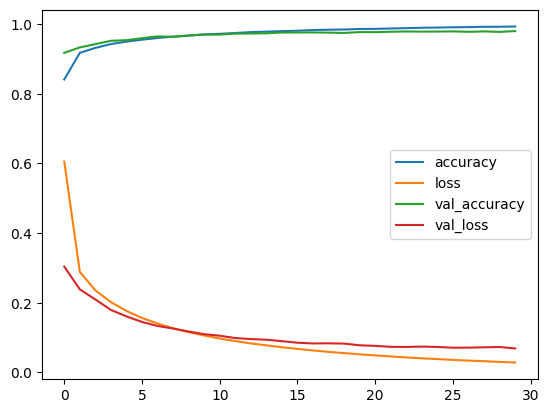

In [28]:
pd.DataFrame(history.history).plot()

In [29]:
model_clf.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9742 - loss: 0.0839


[0.06979351490736008, 0.9783999919891357]

### Sample Check

In [30]:
x_new = x_test[:3]

In [31]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

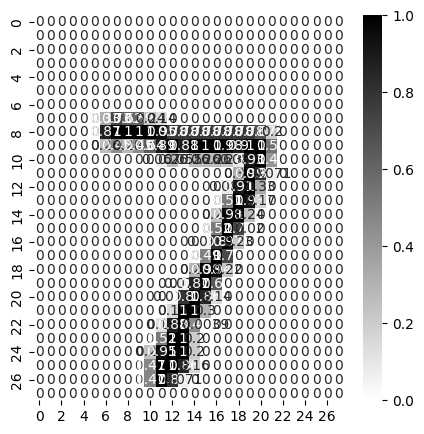

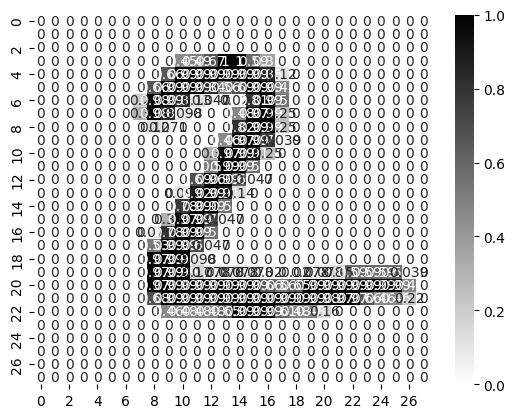

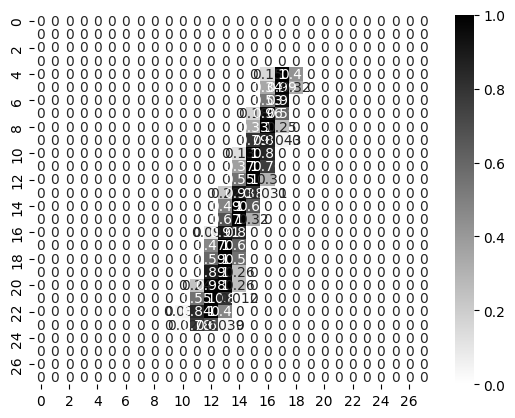

In [36]:
plt.figure(figsize=(5,5))
for i in range(len(x_new)):
    sns.heatmap(x_test[i],annot=True, cmap='binary')
    plt.show()

In [37]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.995, 0.   , 0.   , 0.001, 0.   , 0.   , 0.001, 0.002,
        0.   ]], dtype=float32)

In [38]:
y_prob

array([[3.3894582e-06, 4.1347473e-08, 7.1219554e-05, 7.6824123e-05,
        1.6309523e-09, 1.2513087e-06, 7.1687066e-11, 9.9982315e-01,
        1.0756374e-06, 2.3134706e-05],
       [6.3926927e-06, 1.3922456e-04, 9.9976045e-01, 8.1211831e-05,
        5.0886362e-10, 2.1899505e-06, 6.0703414e-06, 2.5678289e-11,
        4.5052479e-06, 4.9204000e-12],
       [7.6594361e-06, 9.9544537e-01, 3.7995359e-04, 3.6773319e-05,
        9.3695318e-04, 1.7588315e-04, 6.1787556e-05, 1.1174100e-03,
        1.7427476e-03, 9.5421485e-05]], dtype=float32)

In [39]:
y_pred = np.argmax(y_prob, axis=-1)

In [40]:
y_pred

array([7, 2, 1])

In [41]:
actual

array([7, 2, 1], dtype=uint8)

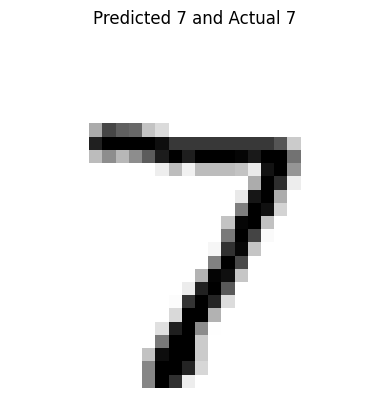

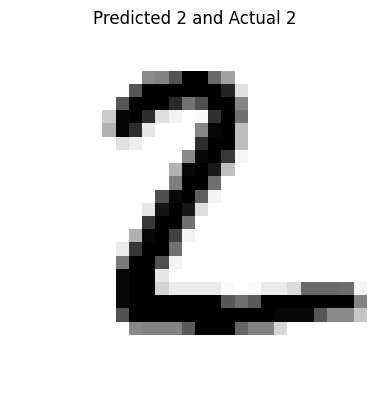

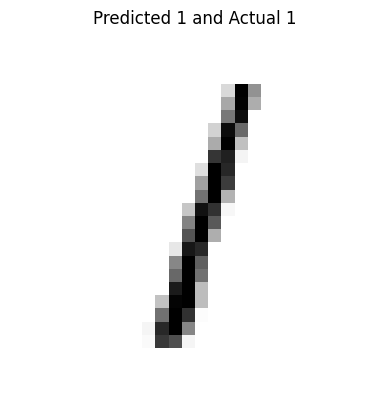

In [43]:
for data,pred,actual_data in zip(x_new, y_pred, actual):
    plt.imshow(data,cmap='binary')
    plt.title(f"Predicted {pred} and Actual {actual_data}")
    plt.axis("off")
    plt.show()